**Question 1**

Setting up the process

In [376]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import math

mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=['r', 'teal', 'g', 'purple', 'darkorange'])   # colour cycle for plots
rng = np.random.default_rng(seed=69420)     # set up random number generator with fixed seed for reproducability

Generating the spikes, uses the exponential distribution to determine the time to the next spike. Could be optmised, calculating both the homo and inhomo case while only returning one is silly

In [208]:
def SpikeGeneration(timeStop = 1, refractory = 0):
    # refractory is minimum time between spikes for the inhomogeneous case
    spikes = []
    timeTotal = 0
    # calculate the lambda for the neuron with a refractory period
    # to keep the overall firing rate at 35Hz
    #if the refractory period is 0 lambda=35
    expected = 1/(1/35 - refractory)
    
    while timeTotal < timeStop:
        time = -math.log(rng.uniform())/expected
        timeTotal += refractory + time
        if timeTotal > timeStop:
            break

        spikes.append(timeTotal)        

    return spikes

Calculating the ISI coefficient, $C_{ISI} = \frac{\sigma}{\mu}$

In [209]:
# Errors in ISICoeff() and FanoFactor() are due to np.mean()
# if a set of no spikes are passed to either function there is division by 0
# numpy deals with it automatically, but to fix it increase the window of measurement or the firing rate
# I simply pretend it isn't a problem and ignore the big red error boxes however
def ISICoeff(spikes):
    spikeISI = []
    for spike in range (0, len(spikes)):
        if spike == 0: pass
        else:
            spikeISI.append(spikes[spike] - spikes[spike - 1])

    return np.std(spikeISI) / np.mean(spikeISI)

Calculating the fano factor for a given set of spike trains, $F=\frac{\sigma^2}{\mu}$

In [210]:
def FanoFactor(spikes):
    # spikes should be a 2D array with D-1 being the differing runs & D-2 the spikes in those runs
    # the function calculates the spike counts for the runs and returns the fano factor
    # !!!!TAKES THE VECTOR OF SPIKE TIMES!!!! NOT SPIKES THEMSELVES
    spikeCounts = [len(run) for run in spikes]
    return np.var(spikeCounts) / np.mean(spikeCounts)

Plotting the spikes for refractory periods of 0ms, 5ms, 10ms for Q1.ii

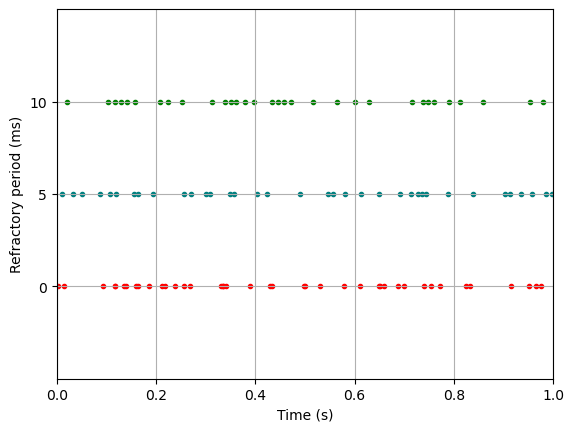

In [211]:
spikesHomo = SpikeGeneration()
spikesInhomo = SpikeGeneration(refractory = 0.005)
spikesInhomo2 = SpikeGeneration(refractory = 0.01)

fig, ax = plt.subplots()
ax.scatter(spikesHomo, np.zeros(len(spikesHomo)), label='r=0ms', marker='.')
ax.scatter(spikesInhomo, np.ones(len(spikesInhomo)), label='r=5ms', marker='.')
ax.scatter(spikesInhomo2, np.ones(len(spikesInhomo2))*2, marker='.')
ax.set_ylim([-1, 3])
ax.set_xlim([0, 1])
ax.set_yticks([0, 1, 2], labels=['0', '5', '10'])
ax.set_xlabel('Time (s)')
ax.set_ylabel('Refractory period (ms)')
ax.grid()

fig.savefig('Q1ii.pdf', format='pdf')
# cHomo should be ~1, I assume cInhomo should be less than

In [212]:
runCount = 100

# the mean is used otherwise the values are a bit far off what they should be
ISIHomo = np.mean([ISICoeff(SpikeGeneration()) for x in range(0, runCount)])
ISIInhomo = np.mean([ISICoeff(SpikeGeneration(refractory=0.005)) for x in range(0, runCount)])

print(ISIHomo)
print(ISIInhomo)

0.9153878666237243
0.7988398492047973


Calculating the fano factor for the homogeneous case, the inhomogeneous case needs to be run over multiple $\Delta t$ so is done seperately 

In [213]:
spikesHomo = []
for run in range(0, runCount):
    spikesHomo.append(SpikeGeneration())

print(FanoFactor(spikesHomo))

1.0605949656750573


Calculating the fano factor for both homo and inhomo cases for $\Delta t$ = 10ms, 50ms, 100ms

In [502]:
times = np.linspace(0.01, 0.1, num=100)
# i hate floating point arithmatic
times_special = [0.01, 0.05, 0.1]
fanoFactorHomoSpecial = []
fanoFactorInhomoSpecial = []

fanoFactorHomo = []
fanoFactorInhomo = []

for time in times:
    # absolutely awful lines but fuck it we ball
    fanoFactorHomo.append(np.mean([FanoFactor([SpikeGeneration() for x in range(0, runCount)]) for y in range(0, 10)]))
    fanoFactorInhomo.append(np.mean([FanoFactor([SpikeGeneration(refractory=0.005) for x in range(0, runCount)]) for y in range(0, 10)]))

for time in times_special:
    fanoFactorHomoSpecial.append(np.mean([FanoFactor([SpikeGeneration() for x in range(0, runCount)]) for y in range(0, 10)]))
    fanoFactorInhomoSpecial.append(np.mean([FanoFactor([SpikeGeneration(refractory=0.005) for x in range(0, runCount)]) for y in range(0, 10)]))


[1.0119961902474144, 0.9654985244924305, 1.069722937493014]
[0.650331460960926, 0.6982037622641242, 0.6581795513078136]


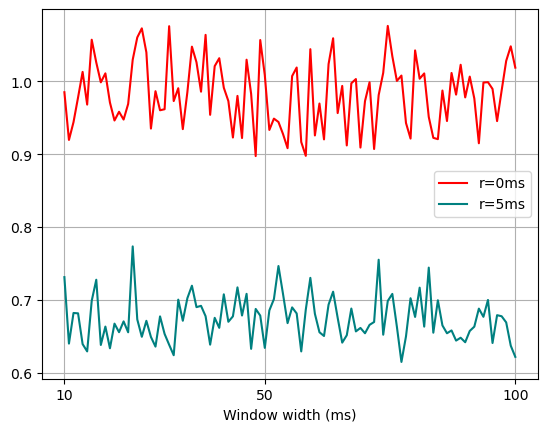

In [503]:
fig, ax = plt.subplots()
ax.plot(times, fanoFactorHomo, label='r=0ms')
ax.plot(times, fanoFactorInhomo, label='r=5ms')
ax.set_xlabel('Window width (ms)')
ax.set_xticks([0.01, 0.05, 0.1], labels=['10', '50', '100'])
ax.grid()
ax.legend()

print(fanoFactorHomoSpecial)
print(fanoFactorInhomoSpecial)

fig.savefig('Q1iii.pdf', format='pdf')

Part iv, gotta plot the ISI and fano factor for $\Delta t$ = 100ms with $refractory \in [0ms, 28ms]$

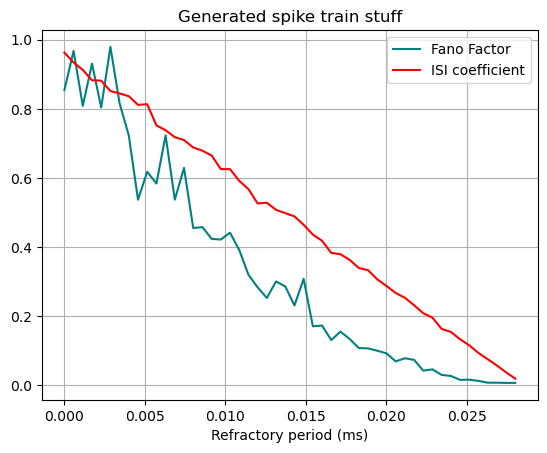

In [470]:

ISI = []
fano = []
spikesTemp = []
refractory = np.linspace(0, 0.028)

#for run in range(0, runCount):
#    spikesTemp.append(SpikeGeneration(timeStop = 0.1))

#fano.append(FanoFactor(spikesTemp))

# inhomogeneous process
for refracTime in refractory:
    spikes = [SpikeGeneration(timeStop=1, refractory=refracTime) for x in range(0, runCount)]
    ISI.append(np.mean([ISICoeff(spike) for spike in spikes]))
    fano.append(FanoFactor(spikes))



fig, ax = plt.subplots()

ax.plot(refractory, fano, color='teal', label='Fano Factor')
ax.plot(refractory, ISI, color='red', label='ISI coefficient')
ax.legend()
ax.set_xlabel('Refractory period (ms)')
ax.set_title('Generated spike train stuff')
ax.grid()

fig.savefig('Q1iv.pdf', format='pdf')

# missing values are due to divsion by zero, can be fixed by increasing delta t but the question asks for it to be 100ms

<b>Question 2</b>

2.0085523370640965


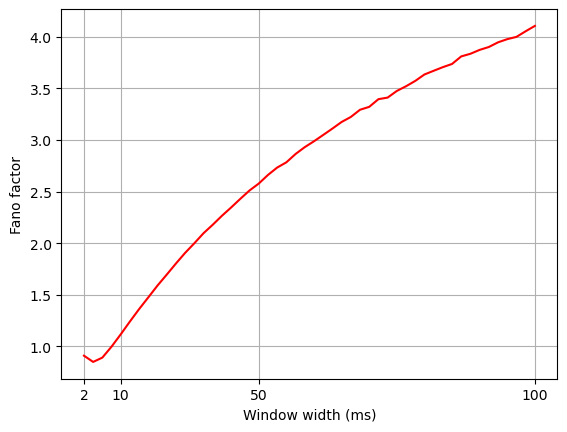

In [245]:
# reading and converting file to numbers
with open('rho.dat', 'r') as data:
    spikes = [int(line.rsplit()[0]) for line in data]

# convert the spikes into a time series with sample frequency deltaT
deltaT = 0.002

# this line is dumb no way this is what im supposed to be doing
spikeTimes = [deltaT*spikeCount*spike for spikeCount, spike in zip(range(0, len(spikes)), spikes) if deltaT*spikeCount*spike > 0]

ISI = ISICoeff(spikeTimes)
print(ISI)

# bin size of 1 is a special case
spikesBinned1 = [[spike] if spike else [] for spike in spikes]

# this is a bit fucked and im not sure why it works but i went through 6 different attempts
binSizes = np.arange(1, 51)
#binSizes = [5, 10, 50]
spikesBinned = []
for binSize in binSizes[1:]:
    spikesTemp = []
    # stole these 2 lines from stackoverflow
    for i in range(0, len(spikes), binSize):
        spikesTemp.append(spikes[i:i + binSize])

    # removes any instance of no spike from the list so that using len() can count the spikes
    # this is the reason bin size of 1 is a special case
    for x in spikesTemp:
        while x.count(0):
            x.remove(0)
    spikesBinned.append(spikesTemp)

# actually doing the fano factor, again bin size 1 is treated seperately
fano1 = FanoFactor(spikesBinned1)
fano = [FanoFactor(spike) for spike in spikesBinned]

fano2 = [fano1]+fano

fig, ax = plt.subplots()
ax.plot(binSizes, fano2)
ax.set_xticks([1, 5, 20, 50], labels=['2', '10', '50', '100'])
ax.set_xlabel('Window width (ms)')
ax.set_ylabel('Fano factor')
ax.grid()

fig.savefig('Q2i.pdf', format='pdf')

**OUTDATED** 
The ISI coefficient is higher than expected for a poisson process, suggesting this spike train is more irregular than a poisson process. The fano factor for bin size 2ms was only slightly lower than 1, suggesting more regularity than a poisson process but this may be a statistical error. The higher the bin size the higher the fano factor with bin size >=5ms having a fano factor higher than would be expected for a poisson process, and thus more regular.

<b> Question 3 </b>
Using the leaky integrate and fire neuron from coursework 3:

In [472]:
from math import e
from random import uniform

def Leaky(rng, refrac=0, Es = 0):
    # generate the leaky integrate and fire neuron voltage over 1 second

    # Es:
    # synapse strength, -ve is inhibatory, +ve is excitatory, should be ~0 ms
    # r:
    # refractory period of the pre-synaptic neuron
    # the pre-synaptic neuron is modelled using the Q1 design, all spikes are pre calculated
    # rng:
    # numpy generator function, included for reproducability
    # Rg:
    # synaptic strength between pre and post synaptic neuron

    m = 10 ** -3    # milli prefix
    M = 10 ** 6     # mega prefix
    n = 10 ** -9    # nano prefix
    
    h = 1 * m       # time step, delta t in euler approx.
    
    tau = 20 * m    # time constant
    vThreshold = -54 * m  # voltage threshold spikes occur at
    El = -70 * m     # leak potential
    R = 10 * M      # membrane resistance
    vReset = -80 * m      # reset voltage
    Ie = 1.8 * n     # electode input current
    
    # synaptic stuff i didn't comment it in the original code so i dont know what it means
    p = 0.5    # no idea where this is used
    tauS = 10 * m
    Rg = 0.15

    
    # Rm is moved into It function to prevent floating point errors
    # I wrote that 3 days ago and just noticed Rm doesn't exist lol
    It = lambda v, t, s: R * Ie + Rg * s * (Es - v)

    # s satisfies tauS * s' = s, solved analytically
    s = lambda t: e ** (-t/tauS)

    # leaky ODE to be solved. It can be done by hand idk why I've done it numerically
    dv_dt = lambda v, t, s: (El - v + It(v, t, s)) / tau
    
    # euler approx. to V
    EulerDv = lambda v, h, f, t, s: v + h * f(v, t, s)
    
    V0 = [uniform(vReset, vThreshold)]
    t = [0]
    # s0 is last time the presynaptic neuron fired
    # set to infinity ago to make s as small as possible when t=0
    s0 = -np.inf

    spikesPre = SpikeGeneration(refractory=refrac)   # presynaptic spike times
    spikesPost = []

    while t[-1] < 1:

        # determining if the pre-synaptic neuron fires in this time step
        try:
            if spikesPre[0] <= t[-1]:
                s0 = spikesPre[0]
                del spikesPre[0]
        except IndexError:
            # if there are no more pre-synaptic spikes catch the error and pass it quietly
            pass

        # calculate voltage of the neurons, value may change if there is a spike
        VTemp0 = EulerDv(V0[-1], h, dv_dt, t[-1], s(t[-1]-s0))

        if VTemp0 < vThreshold:
            V0.append(VTemp0)
        elif VTemp0 >= vThreshold:
            V0.append(vReset)
            spikesPost.append(t[-1])
    
        t.append(t[-1]+h)

    return spikesPost

m = 10 ** -3
Ess = np.linspace(-240*m, 2000*m, num=50)
ISI = []
fano = []

for Es in Ess:
    spikes = []
    ISITemp = []
    fanoTemp = []
    #  run the spike generation multiple times for the fano factor
    for x in range(0, 5):
        for y in range(0, runCount):
            spikes.append(Leaky(rng, Es = Es))
        ISITemp.append(np.mean([ISICoeff(spike) for spike in spikes]))
        fanoTemp.append(FanoFactor(spikes))

    ISI.append(np.mean(ISITemp))
    fano.append(np.mean(fanoTemp))
    
print(ISICoeff(Leaky(rng, Es=0)))


C:\Users\pigwi\anaconda3\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\pigwi\anaconda3\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
C:\Users\pigwi\anaconda3\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\pigwi\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\pigwi\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


0.16473176001079265


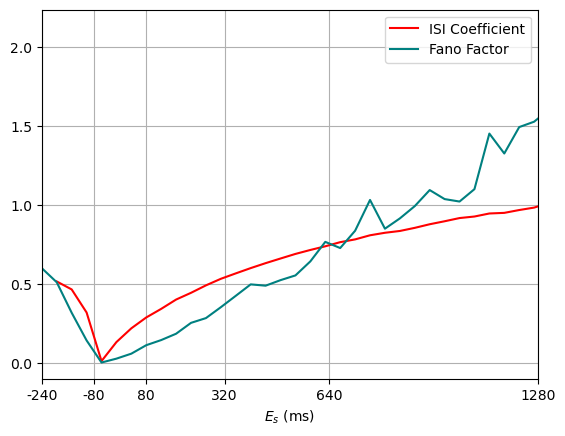

In [406]:
fig, ax = plt.subplots()
ax.plot(Ess, ISI, label='ISI Coefficient')
ax.plot(Ess, fano, label='Fano Factor')
#spikes0 = Leaky(rng)
#ax.scatter(spikes0, np.zeros(len(spikes0)), marker='.')
ax.set_xlabel(r'$E_s$ (ms)')
ax.set_xticks([-240*m, -80*m, 80*m, 320*m, 640*m, 1280*m],
             labels=['-240', '-80', '80', '320', '640', '1280'])
ax.set_xlim([-240*m, 1280*m])
ax.grid()
ax.legend()

fig.savefig('Q3a.pdf', format='pdf')

**OUTDATED**
Changing the expected amount of pre-synaptic neuron spikes has no effect on the fano factor and only increases the ISI coefficient a small amount.
The neuron fires much more regularly than would be expected for a poisson process.

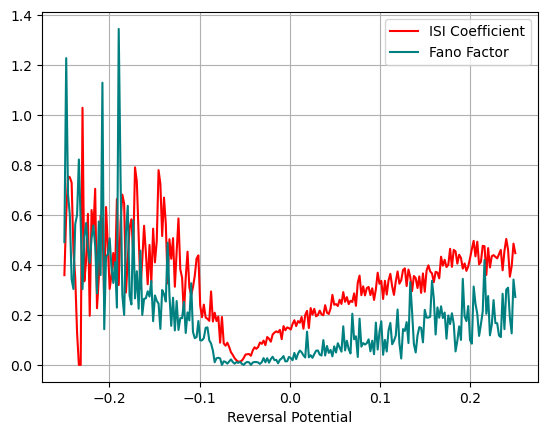

In [473]:
Es = np.linspace(-0.25, 0.25, 250)
ISI = []
fano = []
for E in Es:
    spikes = []
    for q in range(0, 10):
        spikes.append(Leaky(rng, Es=E))
    ISI.append(ISICoeff(spikes[0]))
    fano.append(FanoFactor(spikes))

fig, ax = plt.subplots()
ax.plot(Es, ISI, label='ISI Coefficient')
ax.plot(Es, fano, label='Fano Factor')
ax.legend()
ax.set_xlabel('Reversal Potential')
ax.grid()

fig.savefig('q3b.pdf', format='pdf')
    

**OUTDATED** The ISI coefficient and fano factor are at a minimum when the reversal potential is ~-0.05. It increases drastically as the reversal potential decreases, while increasing a little as reversal potential increases. For all values tested the neuron fires more regularly than would be expected for a poisson process.

Question 4
Spike Triggered Average
$s(\tau)=\frac{1}{n}\sum^n_{i=1}x(t_i-\tau)$

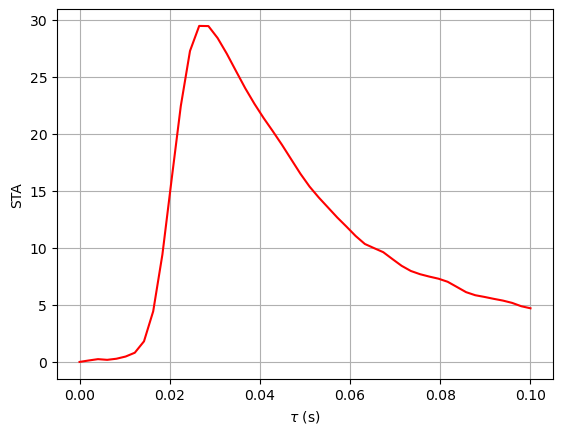

In [462]:
# stimulus data
with open('stim.dat', 'r') as file:
    stim = [float(line.rsplit()[0]) for line in file]

# spike data
with open('rho.dat', 'r') as data:
    spikes = [int(line.rsplit()[0]) for line in data]

deltaT = 0.002
# stupid line again for converting spikes into spike times
spikeTimes = [deltaT*spikeCount*spike for spikeCount, spike in zip(range(0, len(spikes)), spikes) if deltaT*spikeCount*spike != 0]

def sta(spikes, stimulus, tau, deltaT):
    # returns the sta for a given set of SPIKE TIMES, stimulus, tau, and window spikes were measured over
    # generally deltaT is constant for a given set of data (0.002 for stim.dat)
    stimTemp = []
    # prevent IndexErrors somehow with tau/deltaT
    for spike in spikes[abs(int(tau/deltaT)):-abs(int(tau/deltaT))]:
        # int(*) converts the time back into the list index
        stimTemp.append(stimulus[int((spike-tau)/deltaT)])
    return ((1/len(spikes)) * sum(stimTemp))

# s = sta(spikeTimes, stim, tau, deltaT)

taus = np.linspace(-0, 0.1, num=50)
s = []
for tau in taus:
    s.append(sta(spikeTimes, stim, tau, deltaT))

fig, ax = plt.subplots()

ax.plot(taus, s)
ax.set_xlabel(r'$\tau$ (s)')
ax.set_ylabel('STA')
ax.grid()

fig.savefig('Q4.pdf', format='pdf')

Question 5,
following on from Q4

In [463]:
intervals = [0.002, 0.004, 0.01, 0.02, 0.05]
indexes = [1, 2, 5, 10, 25]     # indexing difference for the intervals, 0.002ms is 1 sample behind sample 0
#indexes = np.arange(1, 26)
#intervals = [index*0.002 for index in indexes]

# case where spikes are not necessarily adjacent

spikePairsN = []     # the first spike from a spike pair time for STA calculation

for interval, index in zip(intervals, indexes):
    spikePairsTemp = []
    for spike in range(0, len(spikeTimes)-index):
        # checks if any spikes are an interval apart
        if spikeTimes[spike]+interval in spikeTimes[spike+1:]:
            spikePairsTemp.append(spikeTimes[spike])
    spikePairsN.append(spikePairsTemp)



In [464]:
# case where the spikes are adjacent

spikePairsA = []

for interval, index in zip(intervals, indexes):
    spikePairsTemp = []
    for spike in range(0, len(spikeTimes)-index):
        # checks if only the next spike is an interval apart
        if spikeTimes[spike]+interval == spikeTimes[spike+1]:
            spikePairsTemp.append(spikeTimes[spike])
    spikePairsA.append(spikePairsTemp)

In [465]:
taus = np.linspace(-0.1, 0.1)

sN, sA = [], []
for (spikesN, spikesA) in zip(spikePairsN, spikePairsA):
    sNTemp, sATemp = [], []
    for tau in taus:
        sNTemp.append(sta(spikesN, stim, tau, deltaT))
        sATemp.append(sta(spikesA, stim, tau, deltaT))
    sN.append(sNTemp)
    sA.append(sATemp)


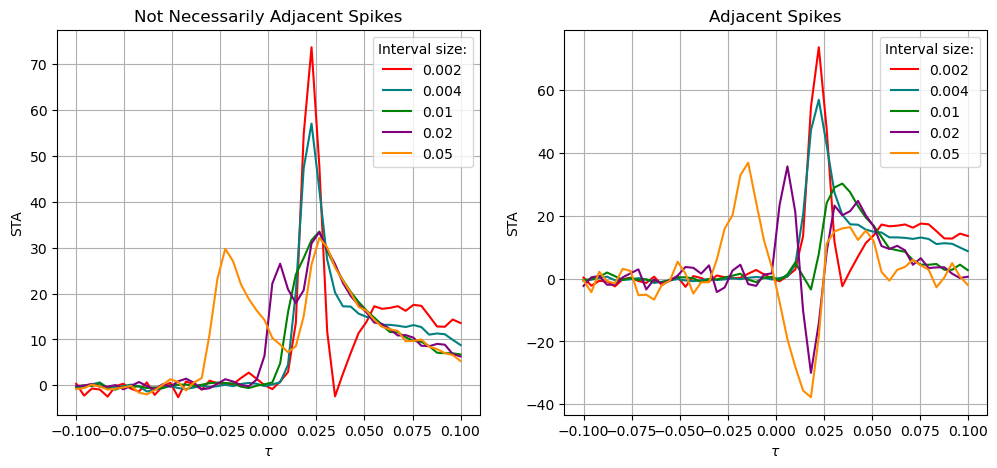

In [466]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
for x in range(0, 5):
    ax[0].plot(taus, sN[x], label=(intervals[x]))
    ax[1].plot(taus, sA[x], label=(intervals[x]))
#ax.plot(taus, sA[2], color='red', label='adjacent')
ax[0].legend(title='Interval size:')
ax[0].set_xlabel(r'$\tau$')
ax[0].set_ylabel('STA')
ax[0].set_title('Not Necessarily Adjacent Spikes')
ax[0].grid()
ax[0].axis('tight')
ax[0].set(adjustable='box')

ax[1].legend(title='Interval size:')
ax[1].set_xlabel(r'$\tau$')
ax[1].set_ylabel('STA')
ax[1].set_title('Adjacent Spikes')
ax[1].grid()
ax[1].axis('tight')


fig.savefig('Q5b.pdf', format='pdf')

STA for adjacently firing neurons is considerabley lower, hitting ~0 with an interval of 0.05 seconds. For 0.002 all spikes seperated by that interval must be adjacent as that is the resolution of the data. Something something the refractory period does stuff.

<b> Question 6 <b>

In [475]:
# uses Leaky(rng, refractory=*, Es=*, data=*) from Q3 where the stimulus file is passed as data
def Leaky2(rng, stimulus, strength=1, res=10, time=1):
    # generate the leaky integrate and fire neuron voltage over 1 second

    # rng:
    # numpy generator function, included for reproducability
    # stimulus:
    # stimulus data from Q4
    # stregnth:
    # amount to scale the input stimulus data by, analagous to synapse strength
    # res:
    # membrane resistance, multipled by 1000000 in function

    m = 10 ** -3    # milli prefix
    M = 10 ** 6     # mega prefix
    n = 10 ** -9    # nano prefix
    
    h = 2 * m       # time step, delta t in euler approx.
    
    tau = 20 * m    # time constant
    vThreshold = -54 * m  # voltage threshold spikes occur at
    El = -70 * m     # leak potential
    R = res * M      # membrane resistance
    vReset = -80 * m      # reset voltage
    Ie = 1.8 * n     # electode input current
    
    # synaptic stuff i didn't comment it in the original code so i dont know what it means
    p = 0.5    # no idea where this is used
    tauS = 10 * m
    Rg = 0.15

    
    # Electrode current and a scaled stimulus input
    It = lambda v, t, s: R * Ie + s * strength

    # leaky ODE to be solved. It can be done by hand idk why I've done it numerically
    dv_dt = lambda v, t, s: (El - v + It(v, t, s)) / tau
    
    # euler approx. to V
    EulerDv = lambda v, h, f, t, s: v + h * f(v, t, s)
    
    V0 = [uniform(vReset, vThreshold)]
    t = [0]
    # s is stimulus at time t
    s = None

    spikesPost = []

    for x in range(0, int(time/0.002)):

        s = stimulus[0]
        del stimulus[0]

        # calculate voltage of the neurons, value may change if there is a spike
        VTemp0 = EulerDv(V0[-1], h, dv_dt, t[-1], s)

        if VTemp0 < vThreshold:
            V0.append(VTemp0)
        elif VTemp0 >= vThreshold:
            V0.append(vReset)
            spikesPost.append(t[-1])
    
        t.append(t[-1]+h)

    return spikesPost


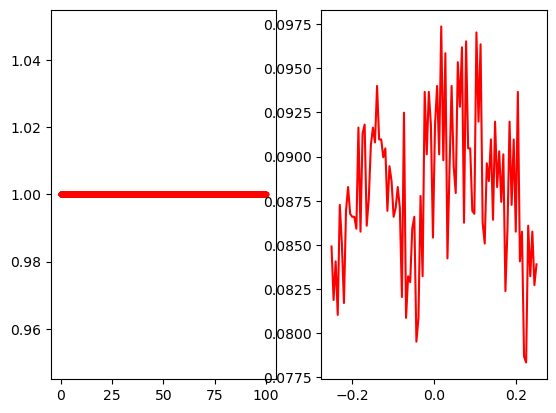

In [476]:
# spike data importing
with open('rho.dat', 'r') as data:
    stim = [int(line.rsplit()[0]) for line in data]


spikes = Leaky2(rng, stimulus=stim, strength=1, time=100)
STA = []
taus = np.linspace(-0.25, 0.25, num=100)
for tau in taus:
    STATemp = []
    for x in range(0, 1):
        STATemp.append(sta(spikes, stim, tau, deltaT))
    STA.append(np.mean(STATemp))

fig, ax = plt.subplots(1, 2)
ax[0].scatter(spikes, np.ones(len(spikes)), marker='.')
ax[1].plot(taus, STA)

fig.savefig('q6.pdf', format='pdf')